#### Phase 4 Data Mining

## Part A

In [19]:
#pip install and imports here
#%pip install scikit-learn 
#%pip install matplotlib
import pandas as pd
import configparser
import sqlalchemy 
import sklearn
import matplotlib.pyplot as plt
from sklearn.calibration import LabelEncoder

In [3]:
# Retrieve data from database
config = configparser.ConfigParser()
config.read('../settings.ini')
db_config = config['DB CONFIGURATION']
try:
    conn_string = "postgresql://"+db_config['USER']+":"+db_config['PASSWORD']+"@"+db_config['HOST']+"/"+db_config['DB_NAME']
    conn_string = conn_string.replace("'","") 
    db = sqlalchemy.create_engine(conn_string, pool_pre_ping=True)
    conn2 = db.connect()
    fact_table_df = pd.read_sql(sql='Fact_Table',con=conn2)
    cinfo_df = pd.read_sql(sql='ContextInfo_Dimension',con=conn2)
    pkd_entry_df = pd.read_sql(sql='PokedexEntry_Dimension',con=conn2)
    conn2.close()
except Exception as e:
    print("\nError:",e)

Some general graphs showing off total stats

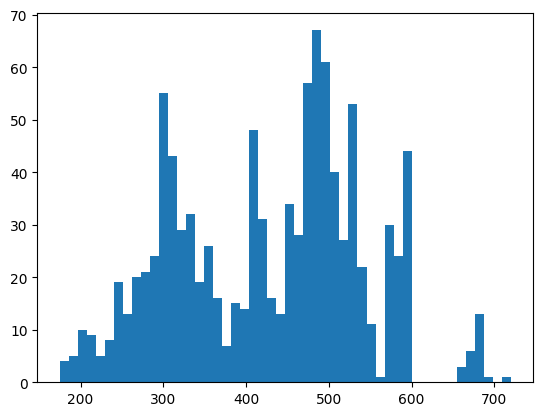

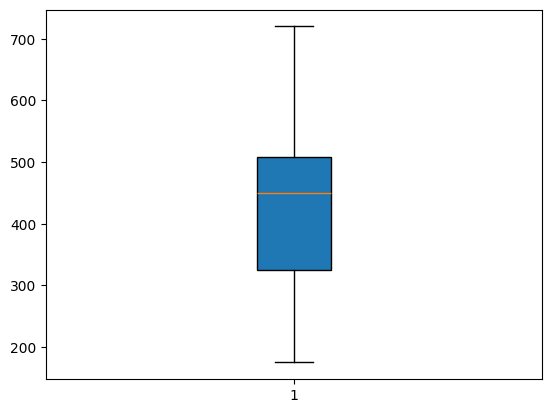

In [39]:

#seperate the pokemons by generation
df_tmp = pd.merge(fact_table_df, cinfo_df, on='ContextInfoKey', how='left')
plt.hist(df_tmp['TOTAL'], bins=50)
plt.show()
plt.boxplot(df_tmp['TOTAL'], patch_artist=True)
plt.show()

generation specific stats

In [ ]:
df_tmp = pd.merge(fact_table_df, cinfo_df, on='ContextInfoKey', how='left')
 
plt.scatter(df_tmp['generation'], df_tmp['TOTAL'])
plt.xlabel('Generation')
plt.xticks(rotation=90)
plt.ylabel('Total stats')
plt.show()

df_tmp2 = df_tmp.groupby('generation')['TOTAL'].mean()
df_tmp2 = df_tmp2.reset_index()

df_tmp3 = df_tmp['generation'].value_counts()

type_avg = pd.merge(df_tmp2, df_tmp3, on='generation', how='left')
type_avg.sort_values(by='TOTAL', ascending=True, inplace=True)
print("average total stats for each generation")
print(type_avg)

Stats by type

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


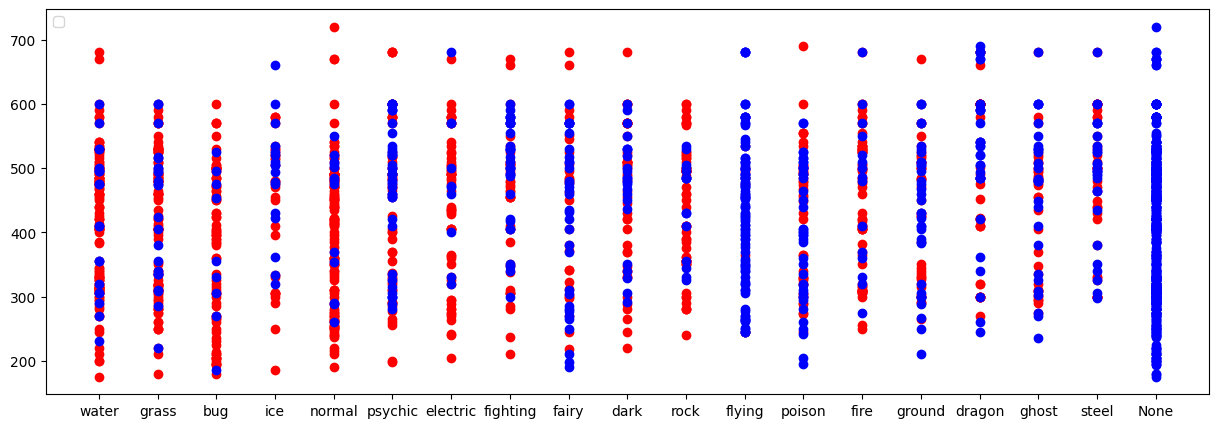

average total stats for each type
       type1       TOTAL  amount
0        bug  374.638554    92.0
12    normal  399.838983   131.0
9      grass  413.116505   127.0
17     water  418.865672   154.0
13    poison  426.333333    83.0
8      ghost  431.171429    65.0
10    ground  434.575000    75.0
4      fairy  436.068966    64.0
7     flying  436.111111   109.0
3   electric  436.305085    69.0
11       ice  436.387097    48.0
15      rock  441.155172    74.0
5   fighting  441.550000    73.0
6       fire  446.196970    81.0
14   psychic  446.716667   102.0
1       dark  454.733333    69.0
16     steel  475.083333    65.0
2     dragon  490.162162    70.0


In [37]:
df_tmp = pd.merge(fact_table_df, cinfo_df, on='ContextInfoKey', how='left')
df_tmp = pd.merge(df_tmp, pkd_entry_df, on='DexEntryKey', how='left') 
df_tmp.sort_values(by='TOTAL', ascending=True, inplace=True)
#plot the data in order that was previously sorted

fig  = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(15, 5)

ax.scatter(df_tmp['type1'], df_tmp['TOTAL'], color='r')

#remove all None values from type2
df_tmp = df_tmp.fillna('None')


ax.scatter(df_tmp['type2'], df_tmp['TOTAL'], color='b')
plt.legend(loc = 'upper left')

plt.show()

#calculate the average of the total stats for each type
df_tmp2 = df_tmp.groupby('type1')['TOTAL'].mean(df_tmp.groupby('type2')['TOTAL'])
df_tmp2 = df_tmp2.reset_index()

a = df_tmp['type1'].value_counts() 
b = df_tmp['type2'].value_counts()

c = pd.Series(a + b)
#name the columns of the series
c = c.reset_index()
c.columns = ['type1', 'amount']

type_avg = pd.merge(df_tmp2, c, on='type1', how='left')


type_avg.sort_values(by='TOTAL', ascending=True, inplace=True)
print("average total stats for each type")
print(type_avg)





Sort by rank

In [ ]:
df_tmp = pd.merge(fact_table_df, cinfo_df, on='ContextInfoKey', how='left')
df_tmp = pd.merge(df_tmp, pkd_entry_df, on='DexEntryKey', how='left') 

plt.scatter(df_tmp['rank'], df_tmp['TOTAL'])
plt.show()

df_tmp2 = df_tmp.groupby('rank')['TOTAL'].mean()
df_tmp2 = df_tmp2.reset_index()

df_tmp3 = df_tmp['rank'].value_counts()

type_avg = pd.merge(df_tmp2, df_tmp3, on='rank', how='left')
type_avg.sort_values(by='TOTAL', ascending=True, inplace=True)
print("average total stats for each rank")
print(type_avg)

Individual stat comparison

In [ ]:
import numpy as np
df_tmp = pd.merge(fact_table_df, cinfo_df, on='ContextInfoKey', how='left')
df_tmp = pd.merge(df_tmp, pkd_entry_df, on='DexEntryKey', how='left') 


fig, ax = plt.subplots(nrows=6, ncols=1, sharex=True, sharey=True)
fig.set_figheight(20)
fig.set_figwidth(10)

ax[0].scatter(df_tmp['HP'], df_tmp['generation'])
ax[0].set_title('HP per Generation')
ax[1].scatter(df_tmp['ATK'], df_tmp['generation'])
ax[1].set_title('ATK per Generation')
ax[2].scatter(df_tmp['DEF'], df_tmp['generation'])
ax[2].set_title('DEF per Generation')
ax[3].scatter(df_tmp['SPATK'], df_tmp['generation'])
ax[3].set_title('SPATK per Generation')
ax[4].scatter(df_tmp['SPDEF'], df_tmp['generation'])
ax[4].set_title('SPDEF per Generation')
ax[5].scatter(df_tmp['SPEED'], df_tmp['generation'])
ax[5].set_title('SPEED per Generation')

plt.show()




data preprocessing 

In [4]:
#one hot encode the generation column
df_tmp = pd.merge(fact_table_df, cinfo_df, on='ContextInfoKey', how='left')
ohc = pd.get_dummies(df_tmp, columns= ['generation'])
print(ohc)

#ordinally encode the generation column
le = LabelEncoder()
df_tmp['generation'] = le.fit_transform(df_tmp['generation'])
print("ordinally encoded values")
print(df_tmp['generation'].unique())

      index_x DexEntryKey ContextInfoKey   HP  ATK  DEF  SPATK  SPDEF  SPEED  \
0           0         1-i     ordinary-i   45   49   49     65     65     45   
1           1         2-i     ordinary-i   60   62   63     80     80     60   
2           2         3-i     ordinary-i   80   82   83    100    100     80   
3           3         4-i     ordinary-i   39   52   43     60     50     65   
4           4         5-i     ordinary-i   58   64   58     80     65     80   
...       ...         ...            ...  ...  ...  ...    ...    ...    ...   
1020     1020     1021-ix    ordinary-ix  125   73   91    137     89     75   
1021     1021     1022-ix    ordinary-ix   90  120   80     68    108    124   
1022     1022     1023-ix    ordinary-ix   90   72  100    122    108     98   
1023     1023     1024-ix   legendary-ix   90   65   85     65     85     60   
1024     1024     1025-ix    mythical-ix   88   88  160     88     88     88   

      TOTAL  ...       rank generation_

## Part B

# We will be making a classifier that predicts the competitive tier of a given pokemon

In [ ]:
#pip install and imports here
%pip install requests

import requests
import csv
import pandas as pd
import json 
import ast

Download competitive pokemon data from https://smogonapi.herokuapp.com and save it to a csv file

In [ ]:
#Download competitive pokemon data
generations = ["rb","gs","rs","dp","bw","xy","sm","ss","sv"]
smogonapi_getPokemonByGen_url = "https://smogonapi.herokuapp.com/GetPokemonByGen/"
rqst = smogonapi_getPokemonByGen_url+generations[-1]
response = requests.get(rqst)
response_json = response.json()

In [ ]:
#Save response to csv file
print(len(response_json))
print(response_json)

csv_file = open('..\data\extended datasets\competitive_df_pokemon.csv', 'w',newline='')
writer = csv.writer(csv_file)


count = 0
for data in response_json:
    if count == 0:
        header = data.keys()
        writer.writerow(header)
        count += 1
    writer.writerow(data.values())
    
csv_file.close()

Clean up the competitive data into a data frame

In [87]:
cptv_pokemon_df = pd.read_csv("../data/extended datasets/competitive_df_pokemon.csv")


columns_to_drop = ['hp','atk','def','spa','spd','spe','weight','height','types','abilities']
cptv_pokemon_df = cptv_pokemon_df.drop(columns_to_drop,axis=1)


cptv_pokemon_df.query('isNonstandard != "CAP"',inplace=True)
df_tmp4 = cptv_pokemon_df.copy()

### Explode the dictionary to retrieve the podex id
df_tmp4["oob"] = df_tmp4["oob"].astype('str')
df_tmp4 = df_tmp4.query('oob != "nan"')

df_tmp4.oob = df_tmp4.oob.apply(eval)

tmp_col = df_tmp4.oob.apply(pd.Series)
cptv_pokemon_df = pd.concat([
        cptv_pokemon_df.drop('oob',axis=1),
        tmp_col        
        ],
        axis=1)

cptv_pokemon_df['index'] = cptv_pokemon_df['dex_number'].astype('Int64') - 1
cptv_pokemon_df["dex_number"] = cptv_pokemon_df["dex_number"].astype('Int64').astype('str')
cptv_pokemon_df = cptv_pokemon_df.query('dex_number != "<NA>"') 

### 
columns_to_drop = ["isNonstandard","evos","alts","genfamily"]
cptv_pokemon_df = cptv_pokemon_df.drop(columns_to_drop,axis=1)
cptv_pokemon_df.formats = cptv_pokemon_df.formats.apply(lambda x: x[1:-1].split(',')[0].replace("'",""))
cptv_pokemon_df.drop_duplicates(subset=['dex_number'],inplace=True)

cptv_pokemon_df.set_index('index',inplace=True)
cptv_pokemon_df.rename(columns={'formats':'tiers'},inplace=True)

#print(cptv_pokemon_df.formats.apply(type))
print(cptv_pokemon_df)

              name         tiers dex_number
index                                      
0        Bulbasaur            LC          1
9         Caterpie  National Dex         10
99         Voltorb            LC        100
999      Gholdengo            OU       1000
1000      Wo-Chien            PU       1001
...            ...           ...        ...
994    Iron Thorns            NU        995
995       Frigibax            LC        996
996       Arctibax           NFE        997
997     Baxcalibur          Uber        998
998     Gimmighoul            LC        999

[1025 rows x 3 columns]


Join the competitive data frame to our fact table data frame and train our classification models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [105]:
## join our data frames and do preliminary steps for training

#print(fact_table_df)
#print(cptv_pokemon_df)
dmm_df = fact_table_df.join(cptv_pokemon_df,on='index')#data mining df for our model


feature_cols = ['HP','ATK','DEF', 'SPATK' , 'SPDEF'  , 'SPEED', 'TOTAL']
features = dmm_df[feature_cols]
target = dmm_df.tiers
print(dmm_df)
print(features)

      index DexEntryKey ContextInfoKey   HP  ATK  DEF  SPATK  SPDEF  SPEED  \
0         0         1-i     ordinary-i   45   49   49     65     65     45   
1         1         2-i     ordinary-i   60   62   63     80     80     60   
2         2         3-i     ordinary-i   80   82   83    100    100     80   
3         3         4-i     ordinary-i   39   52   43     60     50     65   
4         4         5-i     ordinary-i   58   64   58     80     65     80   
...     ...         ...            ...  ...  ...  ...    ...    ...    ...   
1020   1020     1021-ix    ordinary-ix  125   73   91    137     89     75   
1021   1021     1022-ix    ordinary-ix   90  120   80     68    108    124   
1022   1022     1023-ix    ordinary-ix   90   72  100    122    108     98   
1023   1023     1024-ix   legendary-ix   90   65   85     65     85     60   
1024   1024     1025-ix    mythical-ix   88   88  160     88     88     88   

      TOTAL          name tiers dex_number  
0       318     Bu

1. Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier



## Part C

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

In [58]:
totals = fact_table_df['TOTAL']
#find any outliers in the total stats
scaler = StandardScaler()
scaler.fit(totals.values.reshape(-1,1))
totals = scaler.transform(totals.values.reshape(-1,1))
#identify the outliers
outliers = OneClassSVM(kernel="rbf",nu=0.01)
outliers_pred = outliers.fit_predict(totals)
outliers_pred = pd.Series(outliers_pred)

outliers_pred = outliers_pred.map({1:0,-1:1})
print("Accuracy:",accuracy_score(outliers_pred,np.zeros(len(outliers_pred))))

#combine the outliers with the original data to find the names of the outliers
outliers_df = pd.concat([pkd_entry_df['name'],fact_table_df['TOTAL'],outliers_pred],axis=1)
#rename the last column to outliers
outliers_df.columns = ['name','TOTALS','outliers']
outliers_df = outliers_df.query('outliers == 1')

print(outliers_df)






[ 1  1  1 ...  1 -1  1]
Accuracy: 0.9317073170731708
             name  TOTALS  outliers
21         fearow     442         1
23          arbok     448         1
27      sandslash     450         1
39     wigglytuff     435         1
41         golbat     455         1
...           ...     ...       ...
949         klawf     450         1
1013      okidogi     555         1
1014    munkidori     555         1
1015  fezandipiti     555         1
1023    terapagos     450         1

[70 rows x 3 columns]
